In [ ]:
'''
Le lien
    https://developers.synopticdata.com/
    https://www.ncdc.noaa.gov/data-access
    
La liste des stations
    https://www1.ncdc.noaa.gov/pub/data/noaa/isd-history.txt
    
'''

In [1]:
'''
    Les imports
'''
import requests, os
import matplotlib.pyplot as plt

In [2]:
def requete(station_type = "stid", station_id="KLAX", start = "", stop = "", **arg_secondaires):
    
    API_TOKEN = "d48d78ccfbc04fc397146217412d13c2"
    API_ROOT = "https://api.synopticdata.com/v2/"
    
    if start == "" and stop == "" :
        type_requete = "stations/latest"
        api_arguments = {"token":API_TOKEN,"stid":station_id}
    else :
        type_requete = "stations/timeseries"
        api_arguments = {"token":API_TOKEN,station_type:station_id, "start":start,"end":stop}
    
    for key, val in arg_secondaires.items():
        api_arguments[key] = val
    
    api_request_url = os.path.join(API_ROOT, type_requete)
    
    return requests.get(api_request_url, params=api_arguments).json()
    

In [23]:
def date_date2str(annee, mois, jour, heure, minute):    
    if mois < 10 : mois = '0' + str(mois)
    if jour < 10 : jour = '0' + str(jour)
    if minute == 0 : 
        return int(str(annee) + str(mois) + str(jour) + str(heure) + '00')
    else :
         return int(str(annee) + str(mois) + str(jour) + str(heure) + str(minute))
        
def date_str2date(date):
    date = str(date)
    return date[0:4] + "-"+ date[4:6] + "-" + date[6:8] + " / " + date[8:10] + ":" + date[10:12]

In [4]:
def plot(data):
    wind = x["STATION"][0]["OBSERVATIONS"]["wind_speed_set_1"]
    date = x["STATION"][0]["OBSERVATIONS"]["date_time"]
    plt.figure()
    plt.plot(date, wind)
    
    plt.xlabel("date")
    plt.ylabel("m/s")
    
    plt.show()

In [25]:
def print_data(data, start, stop):
    root = data["STATION"][0]
    print('start :', date_str2date(start))
    print('stop :',date_str2date(stop))
    for key, val in root.items():
        if key == "SENSOR_VARIABLES" or key == "OBSERVATIONS" or key == "STATE" or key == "RESTRICTED" or key == "QC_FLAGGED" :
            continue 
        else :
            print(key, ":", val)

start : 2020-12-20 / 10:00
stop : 2021-01-03 / 10:00
STATUS : ACTIVE
MNET_ID : 239
PERIOD_OF_RECORD : {'start': '2018-10-26T14:35:00Z', 'end': '2021-01-04T18:30:00Z'}
ELEVATION : 499
NAME : Toulouse-Blagnac Airport
STID : LFBO
ELEV_DEM : 498.7
LONGITUDE : 1.36382
LATITUDE : 43.62910
TIMEZONE : Europe/Paris
ID : 73674


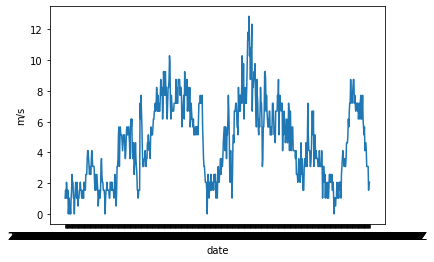

In [26]:
start = date_date2str(2020,12,20,10,00)
stop = date_date2str(2021,1,3,10,00)
stat_id = "LFBO"
x = requete(station_id = stat_id, start = start, stop = stop, units = "metric")
if x["SUMMARY"]["RESPONSE_MESSAGE"] == "OK":
    print_data(data = x, start = start, stop = stop)
    plot(x)
else:
    print(x)